In [1]:
import pandas as pd
import seaborn as sns
from backtest import executer

In [6]:
def result_calculator(row):

    result = (row['price_fst_stock'] - row['open_price_first_stock']) + (row['open_price_scnd_stock'] - row['price_scnd_stock'])
    
    if row['residual_open'] > row['std_open_residual']:
        result = - result

    return result 

In [2]:
dfs = executer()

  0%|          | 0/500 [00:00<?, ?it/s]

In [3]:
df_list = [pd.DataFrame(d) for d in dfs]
df = pd.concat(df_list)
df.head()

,date,pair,status,price_fst_stock,price_scnd_stock,beta,last_residual,std_residual,std_open_residual,residual_open,open_price_first_stock,open_price_scnd_stock,open_date
0,2018-12-14,"(ARZZ3, AZUL4)",False,50.7891,33.35,0.624124,4.087650,2.109399,NaN,NaN,NaN,NaN,NaT
1,2018-12-17,"(ARZZ3, AZUL4)",False,49.7644,31.85,0.620459,4.026344,2.067766,NaN,NaN,NaN,NaN,NaT
2,2018-12-18,"(ARZZ3, AZUL4)",True,50.7118,33.00,0.618525,4.278029,2.043779,2.043779,4.278029,50.7118,33.0,2018-12-18 00:00:00
3,2018-12-19,"(ARZZ3, AZUL4)",True,50.2478,32.37,0.616298,4.222456,2.016459,2.043779,4.278029,50.7118,33.0,2018-12-18 00:00:00
4,2018-12-20,"(ARZZ3, AZUL4)",True,50.9824,33.50,0.615200,4.277016,1.986614,2.043779,4.278029,50.7118,33.0,2018-12-18 00:00:00


In [4]:
cond = (df.status.isin([True, 'close']))

In [11]:
df.loc[cond, 'result'] = df.loc[cond].apply(lambda row: result_calculator(row), axis=1)

In [12]:
result_sum = df.loc[cond].groupby('date').result.sum()

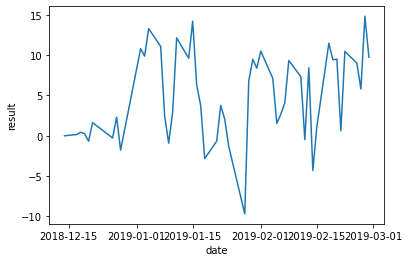

In [60]:
sns.lineplot(x=result_sum.index, y=result_sum)

In [23]:
closed = df.loc[df.status=='close'].groupby('date').result.sum()

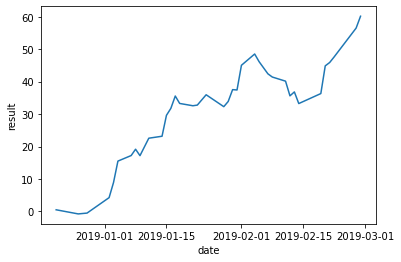

In [28]:
sns.lineplot(x=closed.index, y=closed.cumsum())

In [27]:
df.loc[df.status=='close'].result.sum()

60.13619999999996

In [66]:
final = df.groupby(['open_date', 'pair']).last().reset_index()

In [69]:
final_gpd = final.groupby('date').sum()

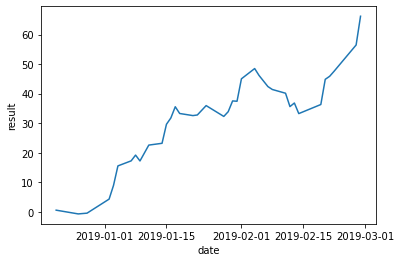

In [71]:
sns.lineplot(x=final_gpd.index, y=final_gpd.result.cumsum())

In [64]:
final

,open_date,pair,result,status,date
0,2018-12-14,"(ARZZ3, SUZB3)",0.5119,close,2018-12-21
1,2018-12-17,"(BBDC4, ITUB4)",-3.1498,close,2019-02-05
2,2018-12-18,"(ARZZ3, AZUL4)",0.2569,close,2018-12-28
3,2018-12-18,"(BBDC3, GOLL4)",5.5985,close,2019-01-24
4,2018-12-19,"(B3SA3, BBDC4)",-0.1179,close,2019-01-14
...,...,...,...,...,...
109,2019-02-26,"(BBDC4, BBSE3)",1.0382,True,2019-02-28
110,2019-02-27,"(ARZZ3, CVCB3)",-0.9132,True,2019-02-28
111,2019-02-27,"(ARZZ3, RADL3)",-0.2467,close,2019-02-28
112,2019-02-27,"(BBDC3, ELET3)",1.0027,True,2019-02-28


In [37]:
df.loc[df.status=='close']

,date,pair,status,price_fst_stock,price_scnd_stock,beta,last_residual,std_residual,std_open_residual,residual_open,open_price_first_stock,open_price_scnd_stock,open_date,result
8,2018-12-28,"(ARZZ3, AZUL4)",close,53.4549,36.0000,0.622494,5.143200,2.006323,2.043779,4.278029,50.7118,33.0,2018-12-18 00:00:00,0.2569
11,2019-01-04,"(ARZZ3, BBDC3)",close,51.7753,25.3607,1.456626,0.313288,1.793075,1.742306,3.835967,51.9588,23.1446,2018-12-21 00:00:00,2.3996
43,2019-02-20,"(ARZZ3, BBDC3)",close,52.6393,28.2287,1.197761,-0.520029,1.825208,1.870653,-4.2187,50.0763,28.6551,2019-02-12 00:00:00,2.9894
43,2019-02-20,"(ARZZ3, BBDC4)",close,52.6393,31.6398,1.065403,-0.519937,1.800860,1.924568,-4.232455,50.0763,32.1508,2019-02-12 00:00:00,3.0740
16,2019-01-11,"(ARZZ3, BBSE3)",close,51.6588,23.4335,2.644258,1.006775,2.170485,2.15564,5.542816,53.6684,22.5046,2019-01-09 00:00:00,2.9385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,2019-01-11,"(BBDC4, MULT3)",close,29.4414,23.3131,1.460086,2.482113,0.631900,0.564791,1.520057,29.0441,23.8543,2019-01-07 00:00:00,-0.9385
28,2019-01-30,"(BBDC4, MULT3)",close,30.3920,25.2911,1.562153,-0.100934,0.730683,0.660691,2.745058,29.789,23.3328,2019-01-14 00:00:00,1.3553
49,2019-02-28,"(BBDC4, MULT3)",close,30.7101,24.7695,1.671838,0.404479,0.848129,0.749698,1.58793,31.7037,24.9368,2019-02-08 00:00:00,0.8263
18,2019-01-15,"(BBDC4, RAPT4)",close,29.7322,8.8467,2.712310,2.993703,0.903233,0.85585,2.365195,29.6329,9.1055,2019-01-10 00:00:00,-0.3581
